# Clasificación con DecisionTree usando RBFSampler con el dataset Digits de scikit-learn

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

## Información del dataset

Casi 1800 imágenes de 8x8 con los dígitos 0..9. Cada píxel se representa con un número entre 0..15, que representa un color en la escala de grises.

En este notebook se hará el training con los datos sacados de RBFSampler. En algunos ejemplos de scikit-learn, normalizan este dataset (dividen cada fila por 16 y luego le restan la media). En este notebook el training se hará directamente con los datos de RBFSampler, sin hacer ningún tipo de preprocesado. Para ver el mismo código pero normalizando, estará en otro notebook.

In [1]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import RBFSampler

In [2]:
import math
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [4]:
sampler = RBFSampler(n_components = 1000)

In [5]:
data = digits.data
target = digits.target
N = data.shape[0] #N: cantidad de instancias, 1797
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [6]:
sampler.fit(data)
data = sampler.transform(data)

In [7]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

## Hacer varias ejecuciones y hacer la media

In [8]:
n_runs = 10
train_scores = []
test_scores = []

In [9]:
for i in range(n_runs):
    clf = DecisionTreeClassifier()
    clf.fit(data_train, target_train)
    train_score = clf.score(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [10]:
print("Mean of test scores:",np.mean(test_scores))
print("Mean of train scores:", np.mean(train_scores))

Mean of test scores: 0.10784641068447413
Mean of train scores: 1.0


In [11]:
print("Standard deviation of test scores:",np.std(test_scores))
print("Standard deviation of train scores:",np.std(train_scores))

Standard deviation of test scores: 0.008286927309509756
Standard deviation of train scores: 0.0


## ¿Como cambia accuracy si incrementamos la cantidad de features extraídas?

In [12]:
digits = load_digits()

In [13]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [14]:
data /= 16
data -= data.mean(axis = 0)

In [15]:
target_train = target[:N_train]
target_test = target[N_train:]

In [16]:
components = 40 * np.arange(70) + 50
scores = []
n_runs = 7

In [17]:
for comp in components:
    sampler = RBFSampler(n_components=comp)
    sampler.fit(data)
    dat = sampler.transform(data)
    dat_train = dat[:N_train]
    dat_test = dat[N_train:]
    clf = DecisionTreeClassifier()
    clf.fit(dat_train, target_train)
    sc = 0
    for i in range(n_runs):
        sc += clf.score(dat_test, target_test)
    sc /= n_runs
    scores.append(sc)

Text(0,0.5,'Accuracy achieved')

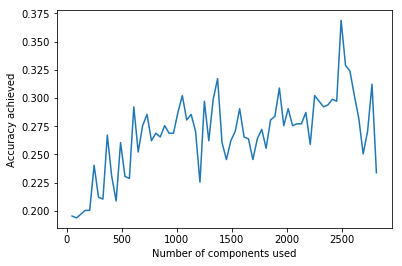

In [20]:
plt.plot(components, scores)
plt.xlabel("Number of components used")
plt.ylabel("Accuracy achieved")

In [21]:
print("Maximum achieved score:",np.max(scores))
print("Minimum achieved score:",np.min(scores))

Maximum achieved score: 0.3689482470784641
Minimum achieved score: 0.19365609348914856


### Conclusiones

El modelo parece ajustar muy bien, pero no generaliza nada. La cantidad de features extraídas parece ayudar a incrementar la precisión, aunque tiene mucha varianza.